In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
import shapefile as shp
import geopandas as gpd

In [62]:
file = nc.Dataset("dades/CALIOPE/hourly/sconcno2/sconcno2_2021012700.nc")
#sf = shp.Reader("dades/LimitsAdministratius/Catalunya/divisions-administratives-v2r1-catalunya-5000-20240705")
gdf = gpd.read_file("dades/LimitsAdministratius/Catalunya/divisions-administratives-v2r1-catalunya-5000-20240705.shp")

In [63]:
print(file['time'])

<class 'netCDF4.Variable'>
float64 time(time)
    units: hours since 2021-01-26 00:00:00 UTC
    standard_name: time
    calendar: gregorian
    long_name: time
unlimited dimensions: time
current shape = (48,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [64]:
file['Lambert_conformal']

<class 'netCDF4.Variable'>
int32 Lambert_conformal()
    grid_mapping_name: lambert_conformal_conic
    standard_parallel: 43., 37.
    longitude_of_central_meridian: -3
    latitude_of_projection_origin: 40
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used

In [67]:
print(gdf)

      NOMCAT     CAPCAT  AREACA5000  \
0  Catalunya  Barcelona   32104.585   

                                            geometry  
0  MULTIPOLYGON (((298299.98 4494128.52, 298299.1...  


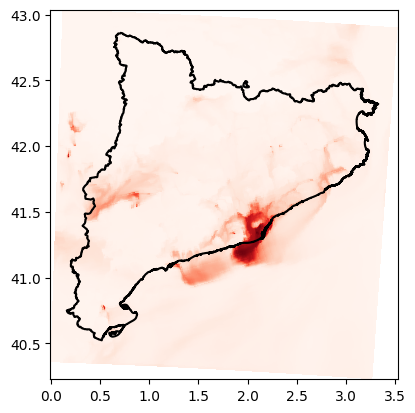

In [74]:
plt.pcolormesh(file['lon'], file['lat'], file['sconcno2'][0][0], cmap='Reds')
ax = plt.gca()
#for shape in sf.shapeRecords():
#    for i in range(len(shape.shape.parts)):
#        i_0 = shape.shape.parts[i]
#        if i + 1 < len(shape.shape.parts):
#            i_f = shape.shape.parts[i+1]
#        else:
#            i_f = len(shape.shape.parts)
#        x = [p[0] / 100000-2 for p in shape.shape.points[i_0:i_f]]
#        y = [p[1] / 100000-5 for p in shape.shape.points[i_0:i_f]]
#        #x, y = zip(*shape.shape.points[i_0:i_f])
#        plt.plot(x,y, 'k-')
gdf.to_crs(4326).boundary.plot(ax=ax, color='k')
plt.show()